In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import * 
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pathlib

In [2]:
IMG_HEIGHT = 180
IMG_WIDTH = 180

In [3]:
data_dir_train = pathlib.Path('C:\\Users\\charm\\Documents\\GitHub\Sign-Language-Translator\\DATA\\asl_alphabet\\asl_alphabet_train')
data_dir_test = pathlib.Path('C:\\Users\\charm\\Documents\\GitHub\Sign-Language-Translator\\DATA\\asl_alphabet\\asl_alphabet_test')
# train = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, image_size=(IMG_WIDTH, IMG_HEIGHT))
test = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test, image_size=(IMG_WIDTH, IMG_HEIGHT))

Found 28 files belonging to 28 classes.


In [4]:
EPOCHS = 10
BATCH_SIZE = 32
FILTERS = 32
POOL_SIZE = (2,2)
INPUT_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)
UNITS = 128

In [5]:
train = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 87000 files belonging to 29 classes.
Using 69600 files for training.


In [6]:
val = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


In [7]:
class_names = train.class_names

In [8]:
train = train.map(lambda x,y: (float(x)/255, y))
val = val.map(lambda x,y: (float(x)/255, y))
test = test.map(lambda x,y: (float(x)/255, y))

In [9]:
def CNN():
    input = keras.layers.Input(shape=INPUT_SHAPE)
    conv1 = keras.layers.Conv2D(FILTERS, (3,3), input_shape=INPUT_SHAPE, activation='relu')(input)
    pool1 = keras.layers.MaxPool2D(pool_size=POOL_SIZE)(conv1)
    conv2 = keras.layers.Conv2D(FILTERS*2, (3,3), input_shape=INPUT_SHAPE, activation='relu')(pool1)
    pool2 = keras.layers.MaxPool2D(pool_size=POOL_SIZE)(conv2)
    conv3 = keras.layers.Conv2D(FILTERS*3, (3,3), input_shape=INPUT_SHAPE, activation='relu')(pool2)
    pool3 = keras.layers.MaxPool2D(pool_size=POOL_SIZE)(conv3)
    flatten = keras.layers.Flatten()(pool2)
    fc1 = keras.layers.Dense(units=UNITS, activation='relu')(flatten)
    d1 = keras.layers.Dropout(rate=0.1)(fc1)
    fc2 = keras.layers.Dense(units=UNITS, activation='relu')(d1)
    d2 = keras.layers.Dropout(rate=0.1)(fc2)
    output = keras.layers.Dense(len(class_names), activation='relu')(d2)

    return Model(inputs=input, outputs=output)

In [10]:
model = CNN()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 118336)            0         
_________________________________________________________________
dense (Dense)                (None, 128)              

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
history = model.fit(
  train,
  validation_data=val,
  epochs=EPOCHS
)

Epoch 1/10
2175/2175 [==============================] - 2975s 1s/step - loss: 1.5424 - accuracy: 0.5693 - val_loss: 0.7117 - val_accuracy: 0.7983
Epoch 2/10
2175/2175 [==============================] - 3149s 1s/step - loss: 0.6462 - accuracy: 0.8137 - val_loss: 0.4389 - val_accuracy: 0.8725
Epoch 3/10
2175/2175 [==============================] - 2092s 962ms/step - loss: 0.4850 - accuracy: 0.8583 - val_loss: 0.4222 - val_accuracy: 0.8766
Epoch 4/10
2175/2175 [==============================] - 2081s 957ms/step - loss: 0.4463 - accuracy: 0.8700 - val_loss: 0.4088 - val_accuracy: 0.8806
Epoch 5/10
2175/2175 [==============================] - 2103s 967ms/step - loss: 0.4282 - accuracy: 0.8743 - val_loss: 0.3908 - val_accuracy: 0.8839
Epoch 6/10
2175/2175 [==============================] - 2253s 1s/step - loss: 0.4151 - accuracy: 0.8785 - val_loss: 0.3930 - val_accuracy: 0.8834
Epoch 7/10
2175/2175 [==============================] - 2125s 977ms/step - loss: 0.4038 - accuracy: 0.8815 - val_lo

In [13]:
model.save("Models/CNN1.h5")

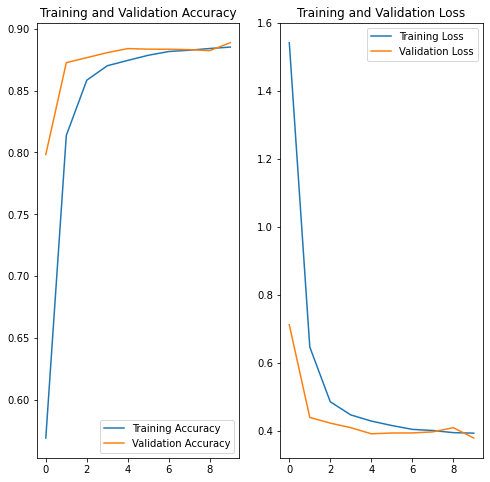

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
# testing that model loads properly
new_model = tf.keras.models.load_model('Models/CNN1.h5')

In [18]:
new_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 118336)            0         
_________________________________________________________________
dense (Dense)                (None, 128)              

In [20]:
letters = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z', 'nothing', 'space']

for l in letters:
    img = keras.preprocessing.image.load_img(
        f"C:\\Users\\charm\\Documents\\GitHub\\Sign-Language-Translator\\DATA\\asl_alphabet\\asl_alphabet_test\\{l}\\{l}_test.jpg", target_size=(IMG_HEIGHT, IMG_WIDTH)
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    predictions = new_model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

This image most likely belongs to A with a 100.00 percent confidence.
This image most likely belongs to B with a 100.00 percent confidence.
This image most likely belongs to C with a 100.00 percent confidence.
This image most likely belongs to D with a 100.00 percent confidence.
This image most likely belongs to E with a 100.00 percent confidence.
This image most likely belongs to F with a 100.00 percent confidence.
This image most likely belongs to P with a 100.00 percent confidence.
This image most likely belongs to H with a 100.00 percent confidence.
This image most likely belongs to I with a 100.00 percent confidence.
This image most likely belongs to J with a 100.00 percent confidence.
This image most likely belongs to A with a 3.45 percent confidence.
This image most likely belongs to L with a 100.00 percent confidence.
This image most likely belongs to M with a 100.00 percent confidence.
This image most likely belongs to N with a 100.00 percent confidence.
This image most likely